### Cross-Sectional Strategies

A simplified version of the strategy is to rank the 12-month return (or 252 trading days in our program below) of a group of 52 physical commodities *every* day, and buy and hold the future with the highest return for 1 month (or 25 trading days) while short and hold the future with the lowest return for the same period.

### Example 6.2: Cross-Sectional Momentum Strategy for Stocks

This code assumes the close prices are contained in *T × N* array *cl*, where *T* is the number of trading days, and *N* is the number of the stocks in S&P 500.

In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import statsmodels.formula.api as sm
#import statsmodels.tsa.stattools as ts
#import statsmodels.tsa.vector_ar.vecm as vm

In [2]:
lookback=252
holddays=25
topN=50

# Stocks
cl=pd.read_csv('inputDataOHLCDaily_20120424_cl.csv')
stocks=pd.read_csv('inputDataOHLCDaily_20120424_stocks.csv')

# remove HH:MM:SS
cl['Var1']=pd.to_datetime(cl['Var1'],  format='%Y%m%d').dt.date
cl.columns=np.insert(stocks.values, 0, 'Date')
cl.set_index('Date', inplace=True)
cl

,A,AA,AAPL,ABC,ABT,ACE,ACN,ADBE,ADI,ADM,...,XL,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZION,ZMH
Date,,,,,,,,,,,,,,,,,,,,,
2006-05-11,36.35,32.16,68.15,20.26,35.00,47.11,26.64,32.63,29.42,40.78,...,54.00,24.82,56.09,28.95,13.13,NaN,30.99,23.66,73.27,62.45
2006-05-12,35.02,31.08,67.70,20.18,34.50,46.55,26.24,31.92,30.56,39.74,...,53.58,24.12,55.01,28.84,12.99,NaN,30.81,23.66,73.52,62.06
2006-05-15,35.70,29.88,67.79,20.30,35.24,47.21,25.96,32.19,30.74,38.89,...,54.47,24.13,54.80,28.96,13.13,NaN,31.03,23.89,73.74,62.03
2006-05-16,32.76,30.03,64.98,20.44,35.54,47.37,26.06,32.30,30.16,39.77,...,54.34,23.89,54.77,28.98,12.93,NaN,30.97,23.38,73.75,62.56
2006-05-17,32.71,28.71,65.26,20.11,34.84,46.22,25.78,31.20,30.37,38.11,...,53.58,23.71,53.19,28.55,12.72,NaN,30.11,23.45,72.81,61.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-04-18,42.32,9.95,608.34,37.45,60.46,72.35,63.56,33.39,38.39,30.93,...,20.89,35.37,85.75,40.31,7.96,27.65,15.49,72.94,21.17,64.29
2012-04-19,41.92,9.76,587.44,37.48,59.51,74.84,63.05,32.90,38.28,30.68,...,21.37,35.04,85.28,39.73,7.91,27.10,15.40,71.41,20.93,63.06
2012-04-20,42.10,9.70,572.98,37.75,59.88,75.30,63.40,33.06,37.81,30.71,...,21.38,34.40,85.30,39.73,7.87,27.36,15.60,73.93,20.54,63.08


<Axes: xlabel='May 1, 2006, to April 24, 2012', ylabel='Cumulative Returns'>

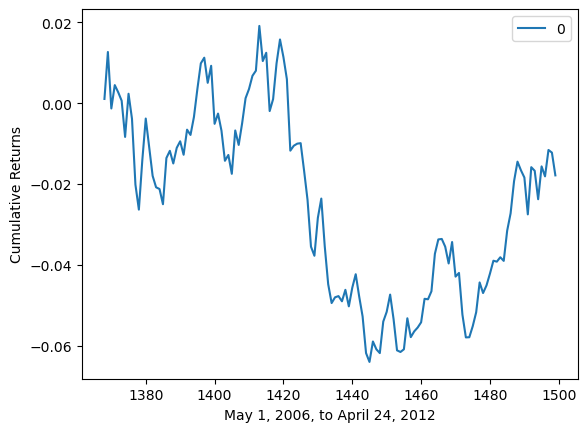

In [3]:
ret=cl.pct_change(periods=lookback)
longs=np.full(cl.shape, False)
shorts=np.full(cl.shape, False)
positions=np.zeros(cl.shape)

for t in range(lookback, cl.shape[0]):
    hasData=np.where(np.isfinite(ret.iloc[t, :]))
    hasData=hasData[0]
    if len(hasData)>0:
        idxSort=np.argsort(ret.iloc[t, hasData]) 
        longs[t, hasData[idxSort.values[np.arange(-np.min((topN, len(idxSort))),0)]]]=1
        shorts[t, hasData[idxSort.values[np.arange(0,topN)]]]=1
        
longs=pd.DataFrame(longs)
shorts=pd.DataFrame(shorts)

for h in range(holddays-1):
    long_lag=longs.shift(h).fillna(False)
    short_lag=shorts.shift(h).fillna(False)
    positions[long_lag]=positions[long_lag]+1
    positions[short_lag]=positions[short_lag]-1
    
positions=pd.DataFrame(positions)
# daily P&L of the strategy
ret=pd.DataFrame(np.sum((positions.shift().values)*(cl.pct_change().values), axis=1)/(2*topN)/holddays)
cumret=(np.cumprod(1+ret)-1)
cumret.plot(
    xlabel='May 1, 2006, to April 24, 2012',
    ylabel='Cumulative Returns'
)

**FIGURE 6.6** Cumulative Returns of Cross-Sectional Stock Momentum Strategy

In [4]:
print('APR=%f Sharpe=%f' % (np.prod(1+ret)**(252/len(ret))-1, np.sqrt(252)*np.mean(ret, axis=0)/np.std(ret)))
# from calculateMaxDD import calculateMaxDD
# maxDD, maxDDD, i=calculateMaxDD(cumret.fillna(0))
# print('Max DD=%f Max DDD in days=%i' % (maxDD, maxDDD))

APR=-0.003019 Sharpe=-0.286628


The APR from May 15, 2007, to December 31, 2007, is 37 percent with a Sharpe ratio of 4.1. The cumulative returns are shown in Figure 6.6. (Daniel and Moskowitz found an annualized average return of 16.7 percent and a Sharpe ratio of 0.83 from 1947 to 2007.) However, the APR from January 2, 2008, to December 31, 2009, is a miserable –30 percent. The financial crisis of 2008–2009 also ruined this momentum strategy. The return after 2009 did stabilize, though it hasn’t returned to its former high level yet.